<a href="https://colab.research.google.com/github/ira89l/Home-tasks-/blob/main/%D0%A4%D1%96%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%B8%D0%B9_%D0%BF%D1%80%D0%BE%D1%94%D0%BA%D1%82_%D0%B4%D0%B0%D1%82%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Фінальний проєкт: "Дослідження ринку нерухомості Лондона"

***Опис датасету***: London Property Listings Dataset

*Цей датасет є розширенням оригінального London Property Listings, включаючи додаткові атрибути для поглибленого аналізу цін на покупку нерухомості в Лондоні. Він ідеально підходить для досліджень і проєктів, пов'язаних з тенденціями на ринку нерухомості, категоризацією цін і аналізом по районах у одному з найактивніших ринків світу.*


***Характеристики датасету:***

*Price:* Ціна на покупку нерухомості в GBP.

*Property Type:* Класифікація нерухомості (наприклад, Apartment, Flat).

*Bedrooms:* Кількість спалень у нерухомості.

*Bathrooms:* Кількість ванних кімнат.

*Size:* Розмір нерухомості в квадратних футах (якщо доступно).

*Postcode:* Поштовий індекс місцезнаходження нерухомості.

*Area:* Загальна інформація про район або мікрорайон.

*Price_Category:* Категоризація цін у попередньо визначені діапазони (наприклад, Low, Medium, High).

*Area_Avg_Price:* Середня ціна нерухомості в тому ж районі.


***Резюме даних:***

*Загальна кількість записів:* 29,537

*Загальна кількість атрибутів:* 9



---

*Цей датасет був підготовлений і завантажений Mehmet Emre Sezer. Він призначений для навчальних та некомерційних цілей.*

[Лінк на датасет](https://www.kaggle.com/datasets/sezermehmetemre/london-property-listings-dataset/data)



***Моя основна ціль*** - дослідження ринку нерухомості Лондона.

Питання:
1. Як розподіляються ціни по районах?
2. У якому районі найбільше об'єктів нерухомості?
3. Чи переважають однокімнатні квартири у певних районах міста?
4. У якому районі найбільша кількість нерухомості з найбільшою площею?
5. Як площа нерухомості співвідноситься з ціновою категорією (Low, Medium, High)?
6. У яких районах переважають доступні за ціною об'єкти (категорія "Low Price")?
7. Який відсоток ринку складає житло з однією спальнею порівняно з багатокімнатними варіантами?
8. Який район має найвищу середню вартість оренди?
9. Чи впливає близькість до центральних районів на ціну оренди? Як змінюється середня ціна оренди між центральними і нецентральними районами?
10. Який район має найбільшу середню площу нерухомості?

[Завантажити файл Power BI проекту](https://drive.google.com/file/d/1Naq_Tbn_Mn3IZYddUk2hrFkRmWgsJlSc/view?usp=sharing)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [3]:
import kagglehub

path = kagglehub.dataset_download("sezermehmetemre/london-property-listings-dataset")

print("Path to dataset files:", path)

100%|██████████| 187k/187k [00:00<00:00, 844kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sezermehmetemre/london-property-listings-dataset/versions/2


In [5]:
data_path = "/root/.cache/kagglehub/datasets/sezermehmetemre/london-property-listings-dataset/versions/2"
file_name = "London Property Listings Dataset.csv"

In [6]:
conn = sqlite3.connect('real_estate_data.db')

In [7]:
dataset = pd.read_csv(f"{data_path}/{file_name}")
print("Dataset successfully loaded")

dataset.to_sql('properties', conn, if_exists='replace', index=False)
print("Таблиця 'properties' успішно створена та заповнена даними.")

query = "SELECT * FROM properties"
data = pd.read_sql_query(query, conn)

print("Перших 5 рядків даних:")
print(data.head())


Dataset successfully loaded
Таблиця 'properties' успішно створена та заповнена даними.
Перших 5 рядків даних:
      Price Property Type  Bedrooms  Bathrooms        Size Postcode  \
0  330000.0     Apartment       1.0        1.0  518.000000      E14   
1  340000.0          Flat       1.0        1.0  887.498269      E14   
2  340000.0     Apartment       1.0        1.0  934.569040      E14   
3  340000.0          Flat       1.0        1.0  887.498269      E14   
4  340000.0          Flat       1.0        1.0  388.000000     SW20   

            Area Price_Category  Area_Avg_Price  
0        Eastern            Low    1.001684e+06  
1        Eastern            Low    1.001684e+06  
2        Eastern            Low    1.001684e+06  
3        Eastern            Low    1.001684e+06  
4  South Western            Low    1.516724e+06  


In [8]:
#перевіряємо наявніст пустих значень і невідповідність типу колонки до її наповнення

print("\nІнформація про датасет:")
print(data.info())

print("\nПеревірка наявності пропущених значень:")
print(data.isnull().sum())


Інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29537 entries, 0 to 29536
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           29537 non-null  float64
 1   Property Type   29537 non-null  object 
 2   Bedrooms        29537 non-null  float64
 3   Bathrooms       29537 non-null  float64
 4   Size            29537 non-null  float64
 5   Postcode        29537 non-null  object 
 6   Area            29537 non-null  object 
 7   Price_Category  29537 non-null  object 
 8   Area_Avg_Price  29537 non-null  float64
dtypes: float64(5), object(4)
memory usage: 2.0+ MB
None

Перевірка наявності пропущених значень:
Price             0
Property Type     0
Bedrooms          0
Bathrooms         0
Size              0
Postcode          0
Area              0
Price_Category    0
Area_Avg_Price    0
dtype: int64


In [9]:
#проведемо чистку наших даних від дублікатів, аномалій

print(data.describe())


              Price      Bedrooms     Bathrooms          Size  Area_Avg_Price
count  2.953700e+04  29537.000000  29537.000000  2.953700e+04    2.953700e+04
mean   9.652355e+05      2.262620      1.621322  1.201678e+03    1.151853e+06
std    8.500518e+05      1.121841      1.120325  8.814953e+03    3.156087e+05
min    6.500000e+04      1.000000      1.000000  2.600000e+01    4.187500e+05
25%    5.000000e+05      1.000000      1.000000  8.200000e+02    1.001684e+06
50%    6.900000e+05      2.000000      1.000000  8.960000e+02    1.001684e+06
75%    1.075000e+06      3.000000      2.000000  1.184000e+03    1.516724e+06
max    5.950000e+06     14.000000    144.000000  1.500000e+06    1.706839e+06


Бачу аномалію:
1. 144 ваних кімнати у помешканні. Скоріше за все, це помилка у введенні даних. Завдяки візувлізації у Power BI можна побачити, що це значення відноситься до однокімнатної квартири у ціновій категорій - medium. Це ще більше запевняє, що це помилкове введення даних.
2. Також помітно можливу аномалію у розмірі одного житла, бо розмір житла близько 140 000 метрів квадратних. Бачу ще одну аномалію у розмірі мінімального житла, бо воно хоч, і відноситься до однокімнатної квартири, але не може бути лише 2 метри квадратних.

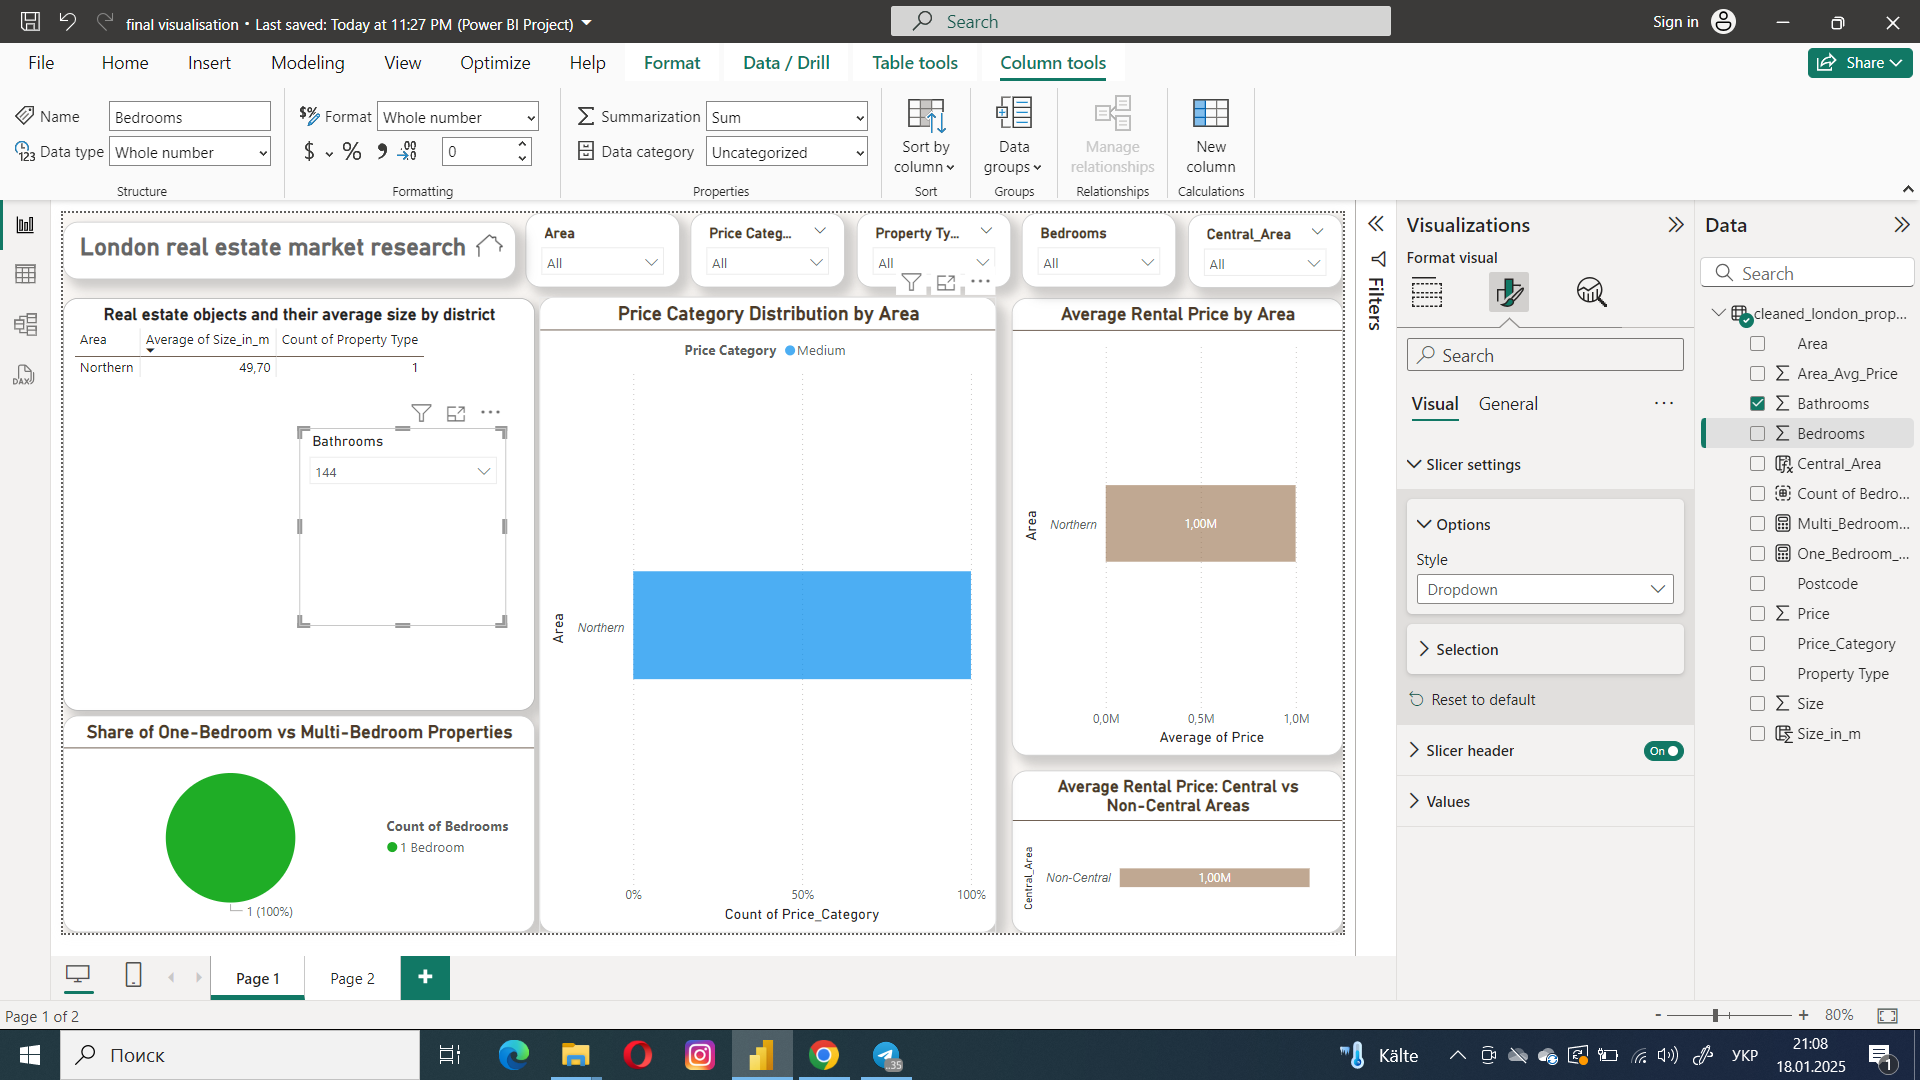

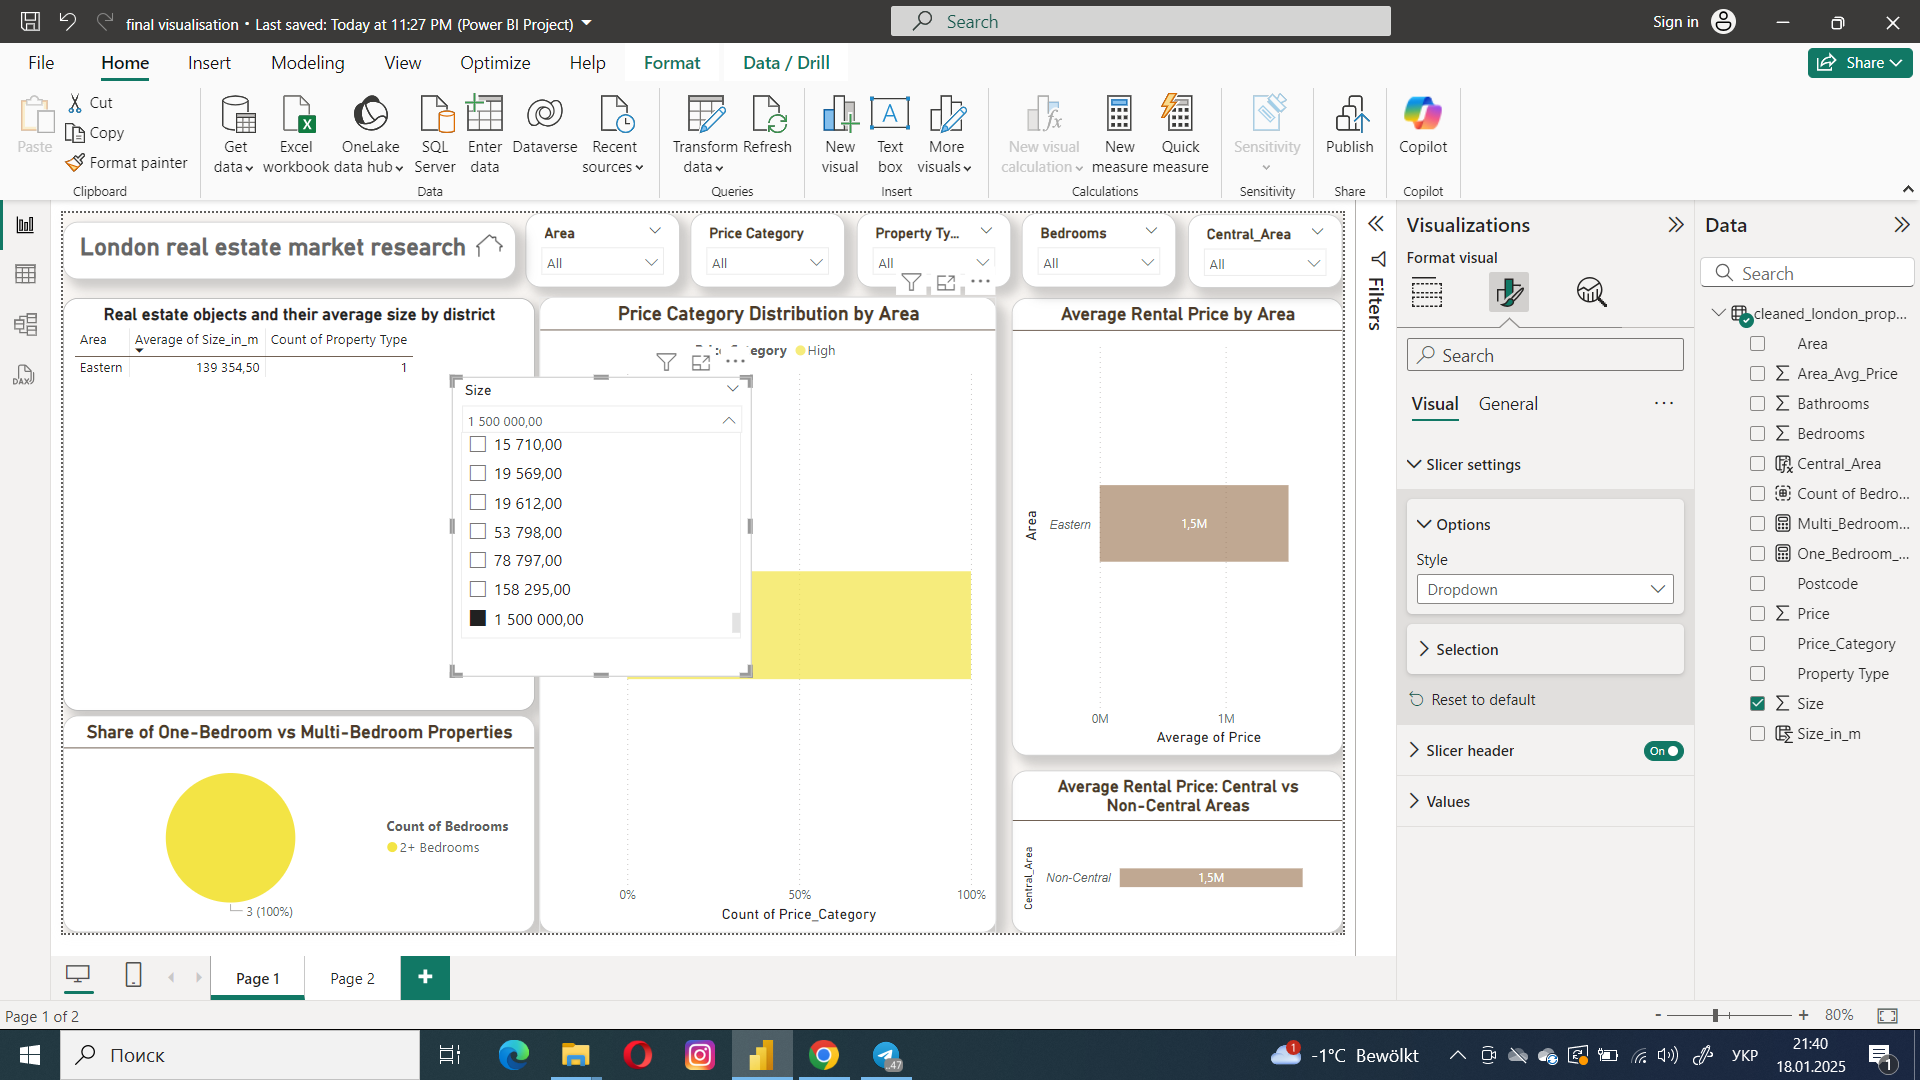

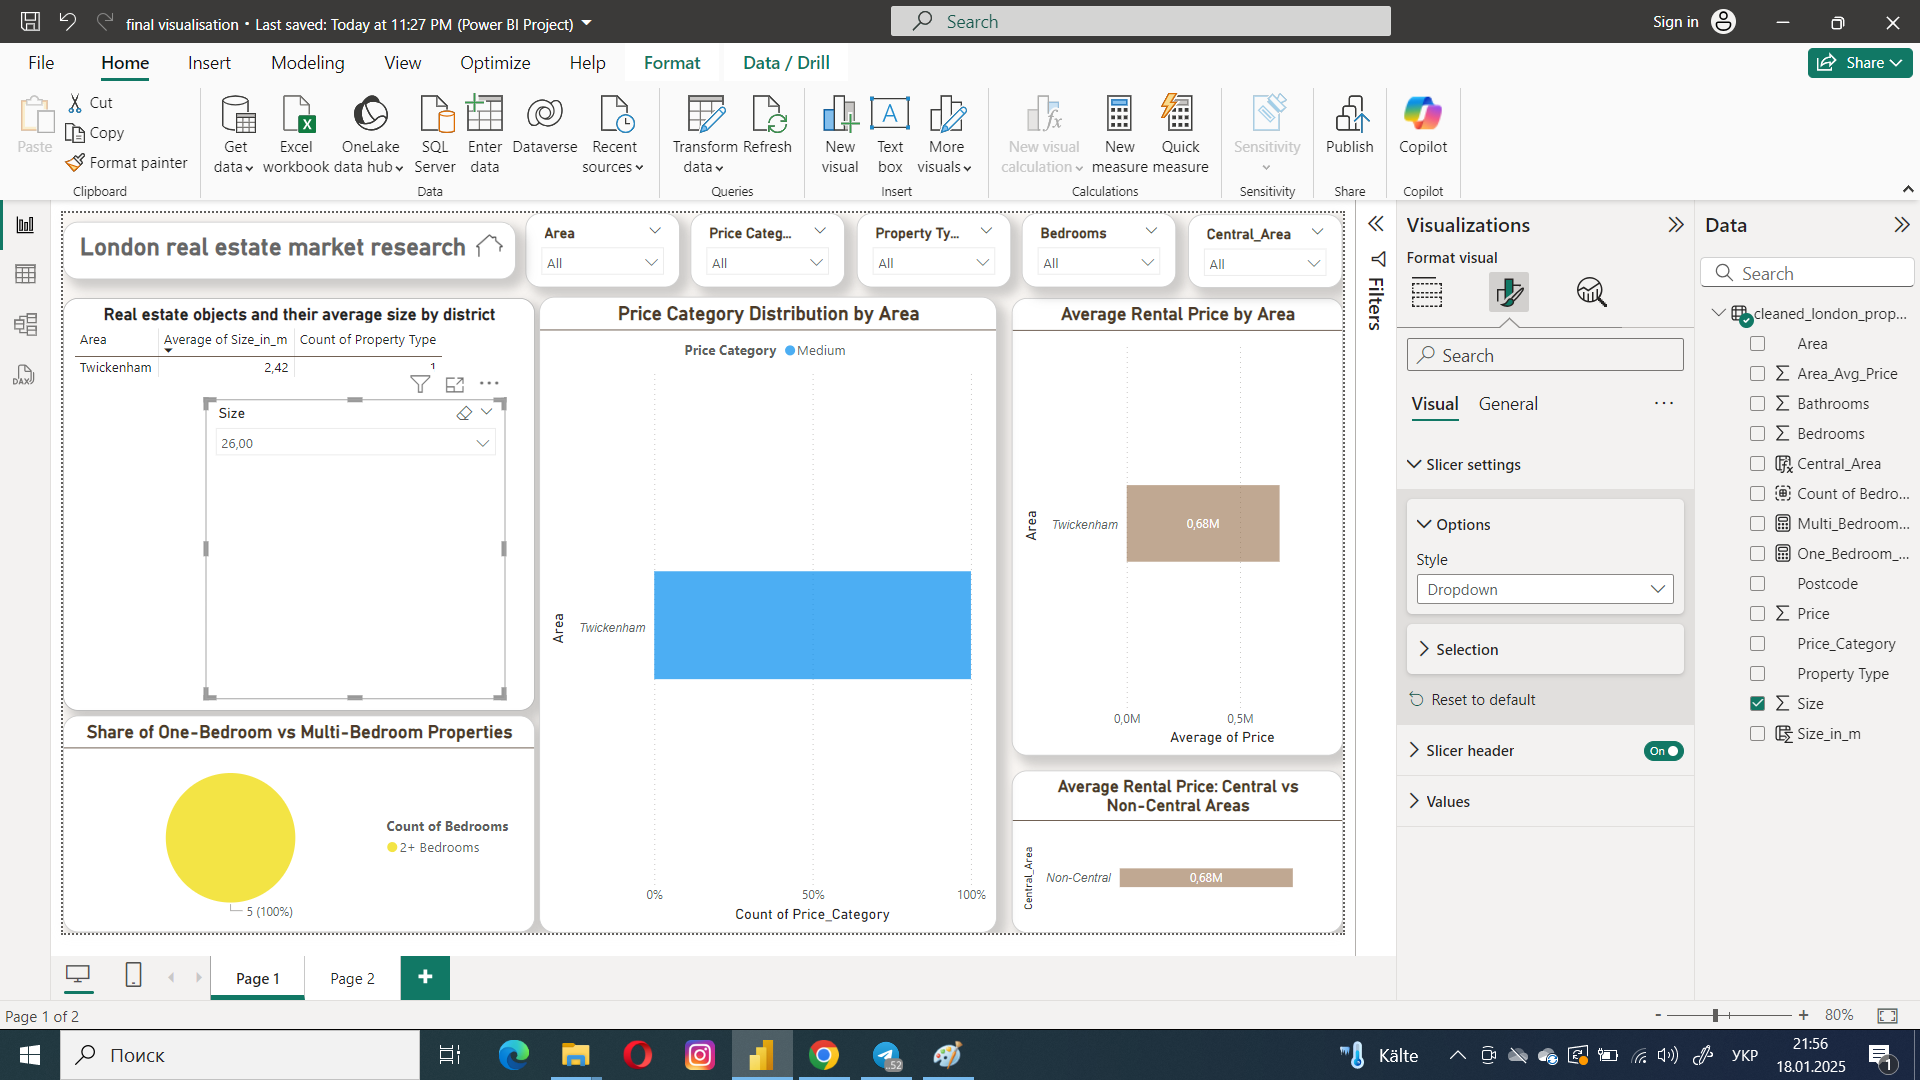

In [10]:
#очищаю код, від аномальних значень у кількості ванних кімнат та аномально великим розміром
data = data[(data['Bathrooms'] < 13) & (data['Size'] < 160000)]

In [11]:
#використаємо таку логіку, щоб відфільтрувати аномально маленькі значення розміру житла
data = data[data['Size'] >= data['Bedrooms'] * 30]

In [12]:
#збережу відфільтрований файл, для додаткової візуалізації у Power BI
filtered_file_path = "filtered_real_estate_data.csv"
data.to_csv(filtered_file_path, index=False, encoding='utf-8-sig')
print(f"Відфільтровані дані збережено у файл: {filtered_file_path}")

Відфільтровані дані збережено у файл: filtered_real_estate_data.csv


Середні ціни по районах:
Area
Bromley                   4.187500e+05
Croydon                   4.352941e+05
Enfield                   5.015973e+05
Harrow                    5.106283e+05
Kingston                  5.700000e+05
Ilford                    5.856667e+05
Sutton                    6.616667e+05
South Eastern             6.657757e+05
Northern                  7.684698e+05
Kingston upon Thames      8.009967e+05
Eastern                   8.420745e+05
Twickenham                8.516071e+05
North Western             1.005454e+06
South Western             1.216610e+06
Eastern Central           1.235202e+06
Western and Paddington    1.378724e+06
Western Central           1.423378e+06
Name: Price, dtype: float64


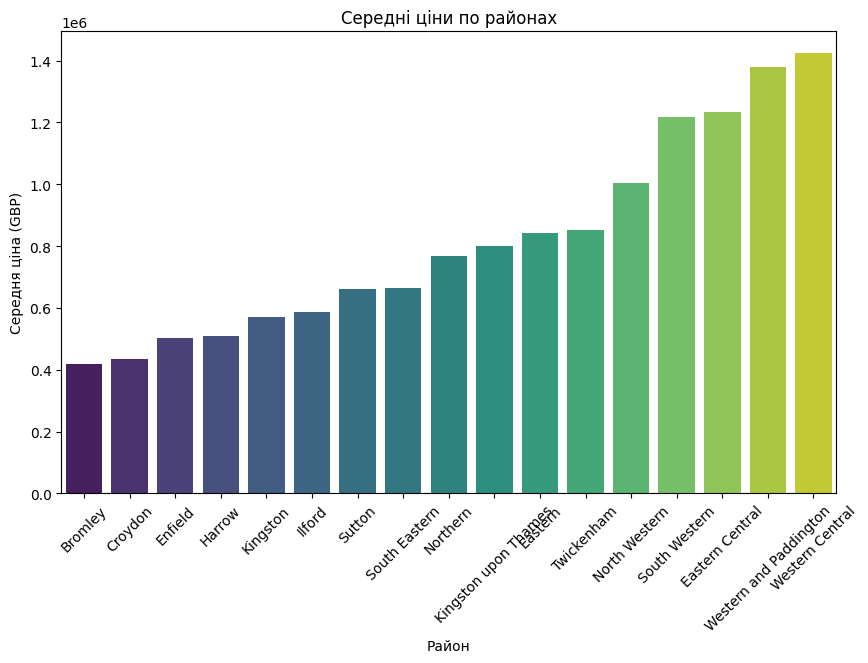

In [22]:
#після фільтрації можна почати аналіз даних
# 1. Як розподіляються ціни по районах?
price_by_area = data.groupby('Area')['Price'].mean().sort_values()
print("Середні ціни по районах:")
print(price_by_area)

plt.figure(figsize=(10, 6))
sns.barplot(x=price_by_area.index, y=price_by_area.values, palette='viridis', hue=price_by_area.index)
plt.title('Середні ціни по районах')
plt.xticks(rotation=45)
plt.xlabel('Район')
plt.ylabel('Середня ціна (GBP)')
plt.show()

**Ми бачимо, що середня ціна найвища у таких районах міста: Western Central,Western and Paddington, Eastern Central. Також з візуалізації у Power Bi бачимо, що у районах Sutton та Kingston є нерухомість тільки одної цінової категорії - medium. А у районах Enfield, Harrow, Croydon, Kingston upon Thames, Bromley, Llford немає житла у категорії - luxury, як і у Sutton та Kingston. Райони Harrow, Croydon, Bromley, Llford мають житло у двох цінових категоріях - low medium.
*Тож можна зробити висновок, що центрацьні райони мають найвищу середню ціну на нерухомість***

Кількість об'єктів нерухомості по районах:
Area
Eastern                   13067
South Western              4993
Western and Paddington     3264
South Eastern              2810
North Western              2376
Northern                   1685
Twickenham                  506
Eastern Central             432
Western Central             223
Enfield                     101
Harrow                       23
Croydon                      17
Kingston upon Thames         15
Bromley                       4
Ilford                        3
Sutton                        3
Kingston                      1
Name: count, dtype: int64


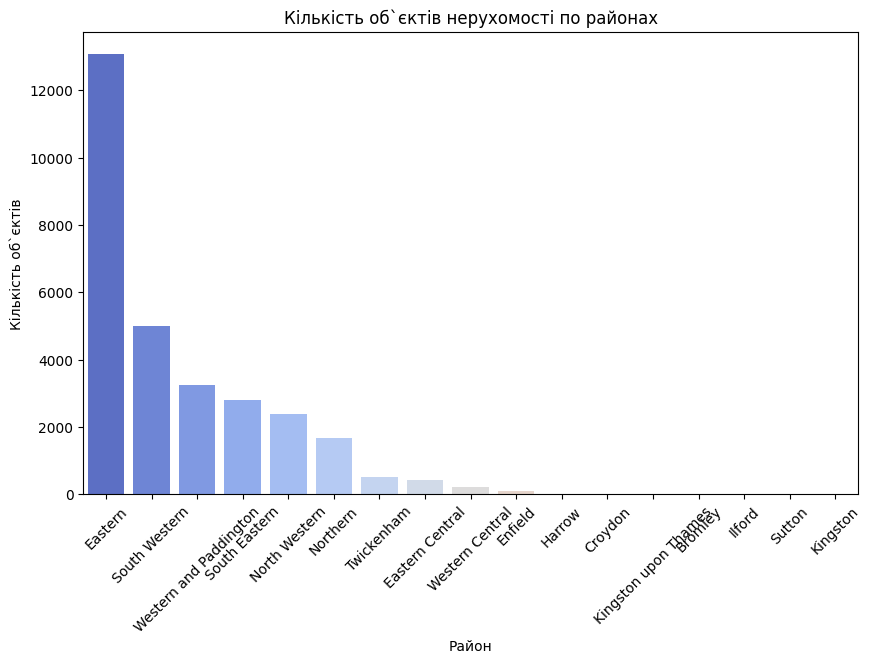

In [23]:
# 2. У якому районі найбільше об'єктів нерухомості?
property_count = data['Area'].value_counts()
print("Кількість об'єктів нерухомості по районах:")
print(property_count)

plt.figure(figsize=(10, 6))
sns.barplot(x=property_count.index, y=property_count.values, palette='coolwarm', hue=property_count.index)
plt.title('Кількість об`єктів нерухомості по районах')
plt.xticks(rotation=45)
plt.xlabel('Район')
plt.ylabel('Кількість об`єктів')
plt.show()

**Ми бачимо, що район з найбільшою кількістю нерухості - це район Eastern, з кількістю житла більше 13 тисяч. Це може бути обумовлено тим, що там нижчі ціни на житло житло (середня цінв 0,8 мільйона), ніж у центральних районах (середня ціна 1,4 - 1,2 мільйона). Можливо там гарна транспортна роз'язка, і тому це може приваблювати потенційних покупців, але транспортне сполучення краще додатково вивчити.**

Розподіл однокімнатних квартир по районах:
Area
Eastern                   3297
South Western             1211
Western and Paddington     855
South Eastern              826
North Western              451
Northern                   411
Eastern Central            158
Twickenham                 102
Western Central             74
Enfield                     21
Harrow                       4
Croydon                      3
Kingston upon Thames         1
Bromley                      1
Name: count, dtype: int64

Відсоток однокімнатних квартир по районах:
Area
Bromley                   25.000000
Croydon                   17.647059
Eastern                   25.231499
Eastern Central           36.574074
Enfield                   20.792079
Harrow                    17.391304
Ilford                          NaN
Kingston                        NaN
Kingston upon Thames       6.666667
North Western             18.981481
Northern                  24.391691
South Eastern             29.395018
South Weste

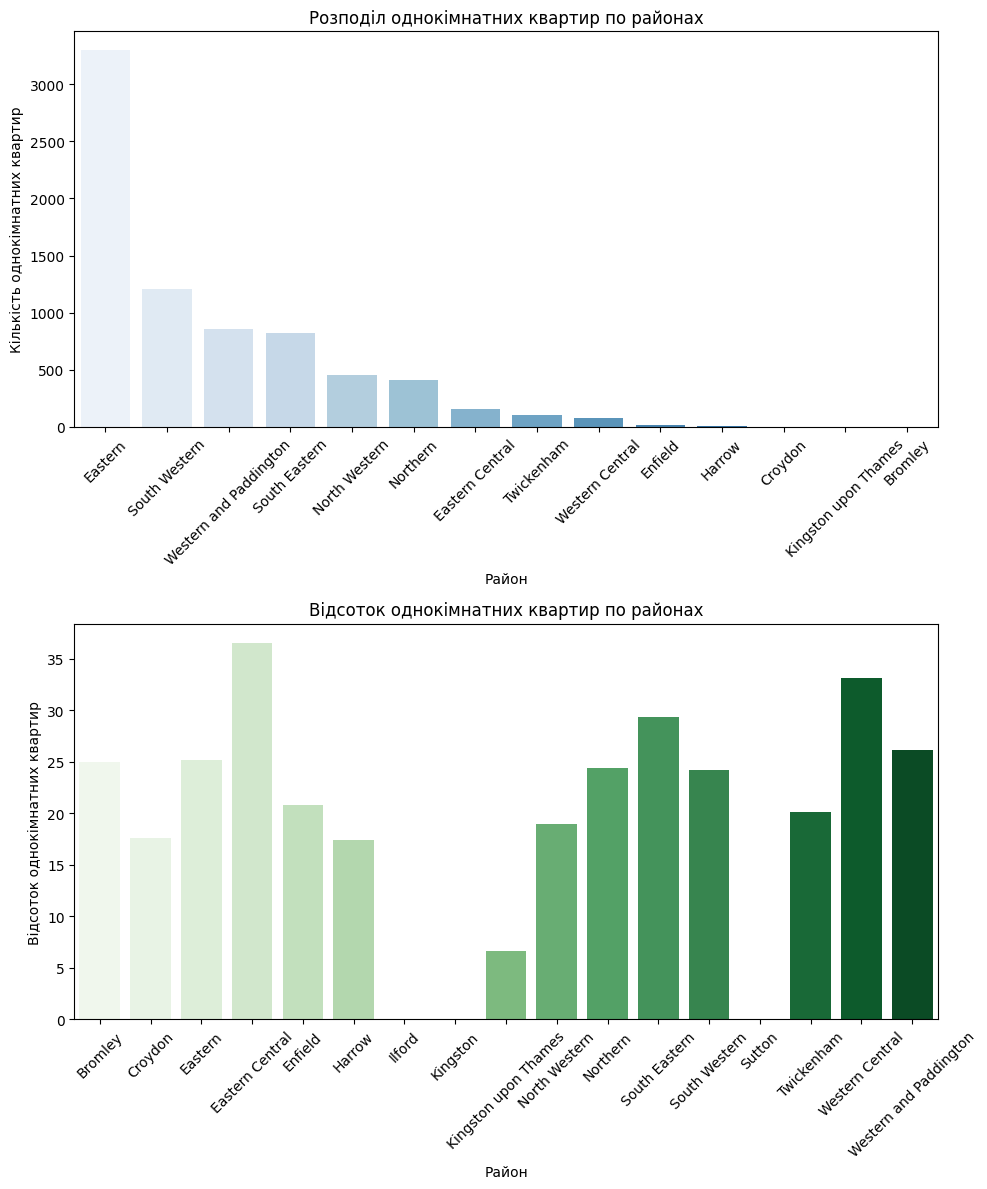

In [24]:
# 3. Чи переважають однокімнатні квартири у певних районах міста?
bedroom_distribution = data[data['Bedrooms'] == 1]['Area'].value_counts()
total_distribution = data['Area'].value_counts()

percentage_bedroom_distribution = (bedroom_distribution / total_distribution) * 100

print("Розподіл однокімнатних квартир по районах:")
print(bedroom_distribution)
print("\nВідсоток однокімнатних квартир по районах:")
print(percentage_bedroom_distribution)

fig, ax = plt.subplots(2, 1, figsize=(10, 12))

#перша візуалізація кількості однокімнатних квартир
sns.barplot(x=bedroom_distribution.index, y=bedroom_distribution.values, palette='Blues', hue=bedroom_distribution.index, ax=ax[0])
ax[0].set_title('Розподіл однокімнатних квартир по районах')
ax[0].set_xlabel('Район')
ax[0].set_ylabel('Кількість однокімнатних квартир')
ax[0].tick_params(axis='x', rotation=45)

#друга візуалізація відсоток однокімнатних квартир від загальної кількості квартир по районаз
sns.barplot(x=percentage_bedroom_distribution.index, y=percentage_bedroom_distribution.values, palette='Greens', hue=percentage_bedroom_distribution.index, ax=ax[1])
ax[1].set_title('Відсоток однокімнатних квартир по районах')
ax[1].set_xlabel('Район')
ax[1].set_ylabel('Відсоток однокімнатних квартир')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Бачимо, що у районах Eastern Central, Western Central та South Eastern однокімннатні квартири займають більше 25% ринку нерухомості. Це свідчить про високий попит на компактне житло у цих районах, ймовірно, через зручне розташування та доступність.**
*Eastern Central* (36.57%) — цей район має найвищий відсоток однокімнатних квартир. Це може свідчити про те, що цей район дуже популярний серед молоді, одиночних осіб або студентів, які шукають компактні та доступні за ціною квартири.
*Western Central* (33.18%) — ще один район з великим відсотком однокімнатних квартир. Як і в інших районах із високим попитом на малогабаритне житло, цей район може бути привабливим завдяки зручному розташуванню і розвиненій інфраструктурі.
*South Eastern* (29.40%) — наступний район з високим відсотком однокімнатних квартир. Такий результат також може свідчити про високий попит на малогабаритне житло, що підтверджує попит на дешевші варіанти нерухомості.
*Kingston upon Thames* (6.67%) — цей район має один з найменших відсотків однокімнатних квартир, що може свідчити про більш високі ціни на нерухомість або про те, що в цьому районі більше переважають більші квартири, які підходять для сімей.
Також бачимо, що у районах *Ilford, Kingston, Sutton* — дані по цих районах відсутні, що значить, що однокімнатного житла там нема. Це може бути пов'язано з транспортною розвязкою, відаленністю района від урбанізованої частини міста або з цінами на нерухомість.

In [16]:
# 4. У якому районі найбільша кількість нерухомості з найбільшою площею?
max_size_area = data.loc[data['Size'].idxmax()]
print("Район із найбільшою площею нерухомості:")
print(max_size_area)

Район із найбільшою площею нерухомості:
Price                  640000.0
Property Type     Semi-Detached
Bedrooms                    5.0
Bathrooms                   2.0
Size                   158295.0
Postcode                    EN1
Area                    Enfield
Price_Category           Medium
Area_Avg_Price    501597.287129
Name: 24857, dtype: object


**Цей результат показує, що нерухомість в Enfield є привабливим варіантом для великих родин або тих, хто шукає більше простору, і готовий інвестувати в якісне житло з комфортними умовами для життя.** Ціна цього будинку £640,000, хоч і вищою за середню (£501,597) для цього району, відображає велику площу будинку (14,706 м.кв.).

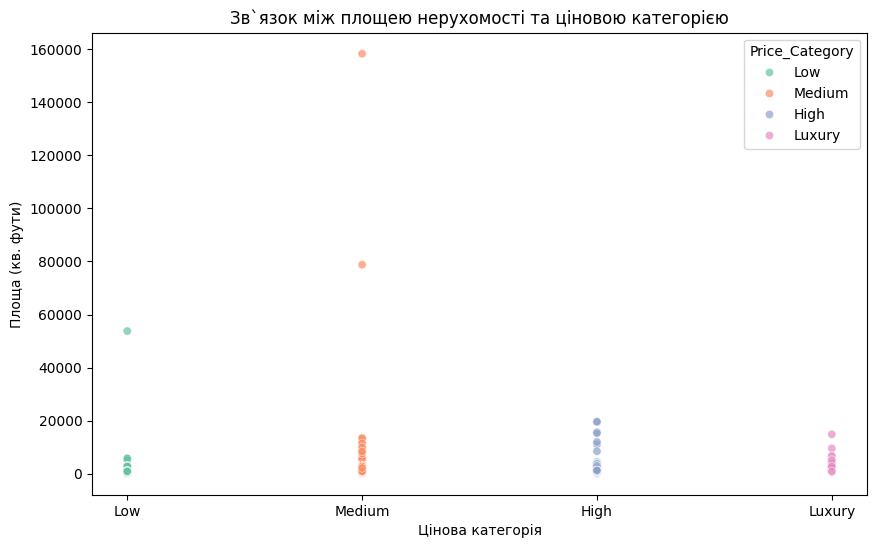

                       mean       median  count
Price_Category                                 
High            1406.512568  1148.000000   4246
Low              836.999675   887.498269   7608
Luxury          1842.286495  1691.000000   2597
Medium          1119.190923   887.498269  15072


In [20]:
# 5. Як площа нерухомості співвідноситься з ціновою категорією (Low, Medium, High)?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Price_Category', y='Size', hue='Price_Category', palette='Set2', alpha=0.7)
plt.title('Зв`язок між площею нерухомості та ціновою категорією')
plt.xlabel('Цінова категорія')
plt.ylabel('Площа (кв. фути)')
plt.show()

pivot = data.groupby('Price_Category')['Size'].agg(['mean', 'median', 'count'])
print(pivot)

**Розмір житла зростає разом із ціновою категорією, що відповідає логіці ринку: вищі ціни забезпечують доступ до більшої площі.**

*Категорії Low та Medium* мають найбільшу кількість об'єктів (Low - 7608, Medium - 15,072), що свідчить про те, що вони є основними сегментами ринку для широкого кола покупців. Категорія *Low* має найменшу середню площу серед усіх груп, що логічно відповідає нижчій ціні. У категорії *Medium* медіанна площа значно менша за середню, що вказує на наявність деяких дуже великих об'єктів, які зміщують середнє значення.

*Категорії High та Luxury* мають більшу площу, але значно меншу кількість об'єктів (Luxury -2597, High - 4246) , що вказує на їх ексклюзивність і високий рівень обмеженого попиту.**

Райони з найбільшою кількістю об'єктів категорії 'Low Price':
Area
Eastern                   3967
South Eastern             1198
South Western              751
North Western              577
Northern                   520
Western and Paddington     331
Twickenham                 147
Enfield                     57
Eastern Central             17
Western Central             15
Croydon                     12
Harrow                      10
Kingston upon Thames         3
Bromley                      2
Ilford                       1
Name: count, dtype: int64


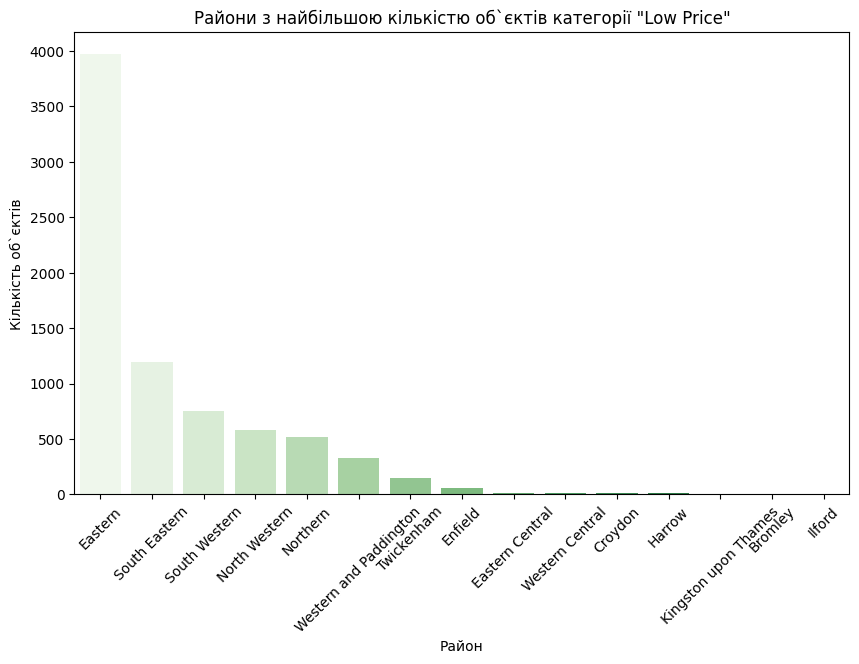

In [25]:
# 6. У яких районах переважають доступні за ціною об'єкти (категорія "Low Price")?
low_price_areas = data[data['Price_Category'] == 'Low']['Area'].value_counts()
print("Райони з найбільшою кількістю об'єктів категорії 'Low Price':")
print(low_price_areas)

plt.figure(figsize=(10, 6))
sns.barplot(x=low_price_areas.index, y=low_price_areas.values, palette='Greens', hue=low_price_areas.index)
plt.title('Райони з найбільшою кількістю об`єктів категорії "Low Price"')
plt.xticks(rotation=45)
plt.xlabel('Район')
plt.ylabel('Кількість об`єктів')
plt.show()

**Eastern є ключовим районом для покупців, які шукають доступне житло. Він має велику частку доступних об'єктів (3967).**
*South Eastern* (1198), хоча і значно поступається Eastern за кількістю об'єктів, але також є важливим районом для цього цінового сегмента.
Райони з низьким рівнем доступного житла - *Kingston upon Thames, Bromley, та Ilford*, можуть бути орієнтовані на покупців із вищими доходами.

Відсотковий розподіл кількості спалень:
Bedrooms
2.0     42.377130
1.0     25.116011
3.0     20.126681
4.0      7.746503
5.0      3.356705
6.0      0.924703
7.0      0.226942
8.0      0.081293
9.0      0.023710
10.0     0.010162
14.0     0.003387
12.0     0.003387
11.0     0.003387
Name: proportion, dtype: float64


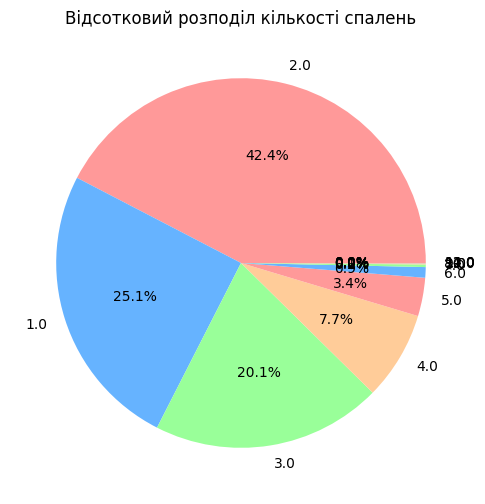

In [27]:
# 7. Який відсоток ринку складає житло з однією спальнею порівняно з багатокімнатними варіантами?
bedroom_percentage = data['Bedrooms'].value_counts(normalize=True) * 100
print("Відсотковий розподіл кількості спалень:")
print(bedroom_percentage)

plt.figure(figsize=(8, 6))
bedroom_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Відсотковий розподіл кількості спалень')
plt.ylabel('')
plt.show()

Ми бачимо, що ***двокімнатні квартири (42.38%)*** складають найбільшу частку ринку нерухомості. Це свідчить про те, що цей формат житла є найбільш популярним серед покупців або найбільш поширеним у забудовників.

А ось ***однокімнатні квартири (25.12%)*** займають друге місце за популярністю, що підтверджує їх значний попит, особливо студентів або тих, хто шукає доступне житло.

**З цієї візуалізації ми можемо побачити, що однокімнатні, трикімнатні квартири разом із двокімнатними охоплюють майже 87.6% ринку, підтверджуючи їхню ключову роль у сегменті масового споживання. Ринок нерухомості значною мірою орієнтований на компактне житло (1-3 спальні), яке є найбільш доступним і популярним. Водночас преміум-сегмент з більшою кількістю спалень залишається нішевим і має обмежений попит.**

In [28]:
# 8. Який район має найвищу середню вартість оренди?
highest_avg_price_area = data.groupby('Area')['Price'].mean().idxmax()
highest_avg_price = data.groupby('Area')['Price'].mean().max()
print(f"Район із найвищою середньою вартістю оренди: {highest_avg_price_area} (Середня ціна: {highest_avg_price:.2f} GBP)")

Район із найвищою середньою вартістю оренди: Western Central (Середня ціна: 1423378.45 GBP)


**Western Central є найбільш дорогим районом для оренди нерухомості з вражаючою середньою ціною в 1,423,378.45 GBP.**

Порівняння середніх цін між центральними і нецентральними районами:
Is_Central
Нецентральний    9.042065e+05
Центральний      1.365444e+06
Name: Price, dtype: float64


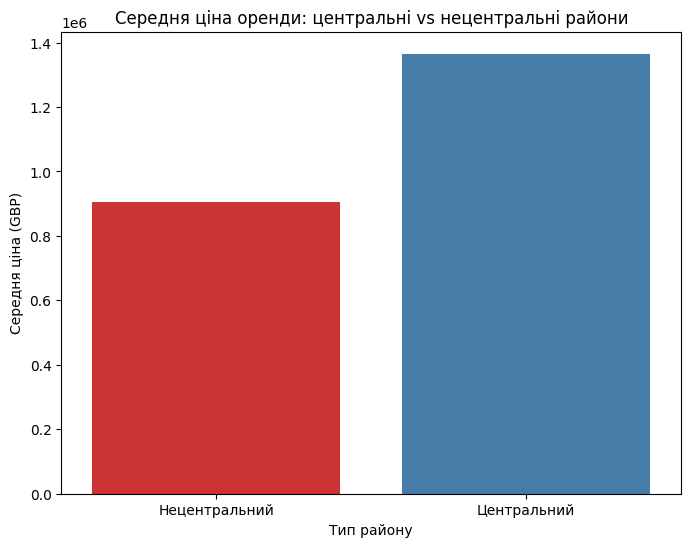

In [26]:
# 9. Чи впливає близькість до центральних районів на ціну оренди? Як змінюється середня ціна оренди між центральними і нецентральними районами?
central_areas = ['Eastern Central', 'Western Central', 'Western and Paddington']
data['Is_Central'] = data['Area'].apply(lambda x: 'Центральний' if x in central_areas else 'Нецентральний')

central_price_comparison = data.groupby('Is_Central')['Price'].mean()

print("Порівняння середніх цін між центральними і нецентральними районами:")
print(central_price_comparison)

plt.figure(figsize=(8, 6))
sns.barplot(x=central_price_comparison.index, y=central_price_comparison.values, palette='Set1', hue=central_price_comparison.index)
plt.title('Середня ціна оренди: центральні vs нецентральні райони')
plt.xlabel('Тип району')
plt.ylabel('Середня ціна (GBP)')
plt.show()

**Бачимо високу різницю між середніми цінами між центральними і нецентральними районами, і підтверджує що близькість до центральних районів є ключовим фактором у формуванні вартості оренди.** це може бути пов'язано з тим, що забудовники центральних районів більше орієнтовані на преміальний сегмент, тоді як нецентральні забезпечують доступніше житло для ширшої аудиторії.

In [30]:
# 10. Який район має найбільшу середню площу нерухомості?
highest_avg_size_area = data.groupby('Area')['Size'].mean().idxmax()
highest_avg_size = data.groupby('Area')['Size'].mean().max()
print(f"Район із найбільшою середньою площею нерухомості: {highest_avg_size_area} (Середня площа: {highest_avg_size:.2f} кв. фути)")

Район із найбільшою середньою площею нерухомості: Enfield (Середня площа: 3073.52 кв. фути)


**Enfield пропонує найбільшу середню площу нерухомості (3073.52 кв. фути)**, що може бути пов'язано з особливостями забудови, доступністю землі та орієнтацією на просторі житлові будинки. Цей результат повністю відображує наші попередні дослідження ринку житла у цьому регіоні, бо житло у районі Enfield має велику площу житла, і ми це досліджували у 4-му питанні. Це ми також можемо побачити і у візуалізації Power BI.

[Завантажити файл Power BI проекту](https://drive.google.com/file/d/1Naq_Tbn_Mn3IZYddUk2hrFkRmWgsJlSc/view?usp=sharing)
